In [40]:
#pennylane optimization
import pennylane as qml
import pennylane.numpy as np
num_wires = 6
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def circuit(theta):
    qml.PauliX(wires=0)
    for i in range(num_wires):
        qml.RY(theta, wires=i)
    return qml.expval(qml.PauliZ(0))

theta = np.array([-2.0] * num_wires, requires_grad=True)

thetas = np.linspace(-np.pi, np.pi, 50)
thetas_matrix = np.tile(thetas, (6, 1))
measurements = np.zeros((6, 50))


for i in range(num_wires):
    for j in range(len(thetas)):
        measurements[i,j] = (circuit(thetas_matrix[i,j]))
        

In [41]:
import pennylane as qml
from pennylane import numpy as np

# Set up the PennyLane QNode
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(theta1, theta2):
    qml.RX(theta1, wires=0)
    qml.RY(theta2, wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

# Define the cost function to optimize
def cost(params):
    theta1, theta2 = params
    return circuit(theta1, theta2)[0]  # We are optimizing with respect to the expectation value of PauliZ on qubit 0

# Initialize the parameters
init_params = np.array([-2, -2])

# Optimize the parameters
opt = qml.GradientDescentOptimizer(0.1)

# Perform optimization
steps = 100
for i in range(steps):
    init_params = opt.step(cost, init_params)
    current_cost = cost(init_params)
    if i%10==0:
        print(f"Step {i + 1}/{steps}: Cost = {current_cost}")

# Print the optimized parameters
print("Optimized parameters:", init_params)

# Evaluate the circuit with the optimized parameters
result = circuit(init_params[0], init_params[1])
print("Expectation values after optimization:", result)


Step 1/100: Cost = -0.4161468365471424
Step 11/100: Cost = -0.9015038162478398
Step 21/100: Cost = -0.987421536307511
Step 31/100: Cost = -0.9984612946674164
Step 41/100: Cost = -0.9998127885353733
Step 51/100: Cost = -0.9999772373731639
Step 61/100: Cost = -0.9999972325651839
Step 71/100: Cost = -0.9999996635440781
Step 81/100: Cost = -0.9999999590948079
Step 91/100: Cost = -0.9999999950268834
Optimized parameters: [-3.14155402 -2.        ]
Expectation values after optimization: (tensor(-1., requires_grad=True), tensor(0.41614684, requires_grad=True))


In [44]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Set up the PennyLane QNode
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(weights, x):
    qml.RY(x[0], wires=0)
    qml.RY(x[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0))

# Define the cost function for binary classification
def cost(weights, x, target):
    prediction = (circuit(weights, x) + 1) / 2  # Map the output to [0, 1]
    return (prediction - target)**2

# Initialize the parameters
init_weights = np.array([0.0, 0.0])

# Optimize the parameters for binary classification
target_labels = 2 * y_train - 1  # Map labels to {-1, 1}

# Perform optimization
opt = qml.GradientDescentOptimizer(0.1)
steps = 100

for i in range(steps):
    for j, (x, target) in enumerate(zip(X_train, target_labels)):
        init_weights = opt.step(lambda w: cost(w, x, target), init_weights)

    if i % 10 == 0:
        predictions_train = [np.sign(circuit(init_weights, x)) for x in X_train]
        acc_train = accuracy_score(target_labels, predictions_train)
        print(f"Step {i + 1}/{steps}: Training Accuracy = {acc_train}")

# Evaluate the circuit with the optimized parameters on the test set
predictions_test = [np.sign(circuit(init_weights, x)) for x in X_test]
acc_test = accuracy_score(2 * y_test - 1, predictions_test)
print("Test Accuracy:", acc_test)


Step 1/100: Training Accuracy = 0.425
Step 11/100: Training Accuracy = 0.43333333333333335
Step 21/100: Training Accuracy = 0.43333333333333335
Step 31/100: Training Accuracy = 0.43333333333333335
Step 41/100: Training Accuracy = 0.43333333333333335
Step 51/100: Training Accuracy = 0.43333333333333335
Step 61/100: Training Accuracy = 0.43333333333333335
Step 71/100: Training Accuracy = 0.43333333333333335
Step 81/100: Training Accuracy = 0.43333333333333335
Step 91/100: Training Accuracy = 0.43333333333333335
Test Accuracy: 0.3333333333333333


C:\Users\petre\AppData\Local\Temp\ipykernel_19816\3210583923.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


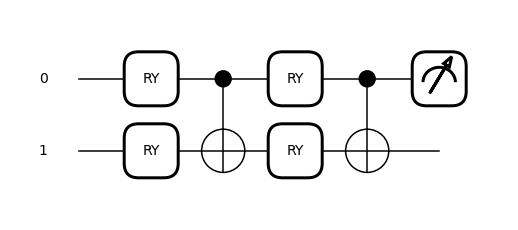

In [45]:
fig, ax = qml.draw_mpl(circuit)([1,1],[1,1])
fig.show()


In [49]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Set up the PennyLane QNode
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def quantum_circuit(params, x):
    qml.templates.AngleEmbedding(x, wires=[0, 1])
    qml.templates.BasicEntanglerLayers(params, wires=[0, 1])
    return qml.expval(qml.PauliZ(0))

# Define the cost function for binary classification
def cost(params, x, target):
    prediction = (quantum_circuit(params, x) + 1) / 2  # Map the output to [0, 1]
    return (prediction - target)**2

# Initialize the parameters
num_layers = 6
num_params = 2 * num_layers  # Each layer has 2 parameters
init_params = np.random.rand(num_params)
init_params /= np.linalg.norm(init_params)  # Normalize the parameters

# Optimize the parameters for binary classification
target_labels = 2 * y_train - 1  # Map labels to {-1, 1}

# Perform optimization
opt = qml.AdamOptimizer(0.1)
steps = 100

for i in range(steps):
    for j, (x, target) in enumerate(zip(X_train, target_labels)):
        init_params = opt.step(lambda p: cost(p, x, target), init_params)

    if i % 10 == 0:
        predictions_train = [np.sign(quantum_circuit(init_params, x)) for x in X_train]
        acc_train = accuracy_score(target_labels, predictions_train)
        print(f"Step {i + 1}/{steps}: Training Accuracy = {acc_train}")

# Evaluate the circuit with the optimized parameters on the test set
predictions_test = [np.sign(quantum_circuit(init_params, x)) for x in X_test]
acc_test = accuracy_score(2 * y_test - 1, predictions_test)
print("Test Accuracy:", acc_test)


ValueError: Features must be of length 2 or less; got length 4.

C:\Users\petre\AppData\Local\Temp\ipykernel_19816\761079480.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


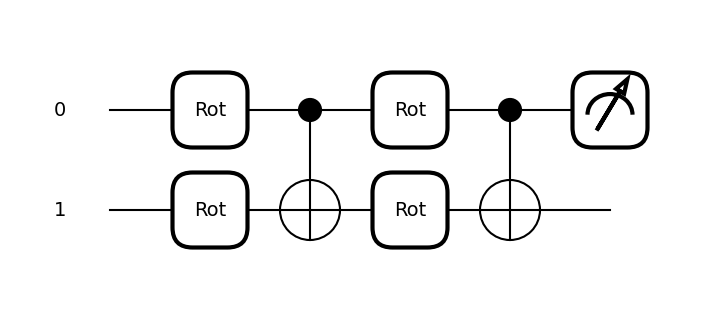

In [48]:
fig, ax = qml.draw_mpl(variational_circuit)([1,1,1,1,1,1],[1,1,1,1,1,1])
fig.show()